# Explication de la méthode et du format

L'approche adoptée repose sur l'utilisation de l'IA Gemini pour automatiser et accélérer l'analyse de données. Dans ce processus, l'utilisateur fournit les jeux de données bruts et décrit simplement en langage naturel les critères de pertinence souhaités. Gemini agit alors comme une interface technique intelligente : elle interprète ces consignes pour générer et appliquer le code de traitement adéquat (fusion, nettoyage, filtrage). Cette méthode permet de s'affranchir de la programmation manuelle complexe pour extraire rapidement et précisément les informations essentielles au sein de volumes de données hétérogènes.

Ce faisant, l'IA Gemini extrait directement les valeurs importantes des datasets proportionnellement aux questions de l'utilisateur pour afficher les graphiques pertinents 

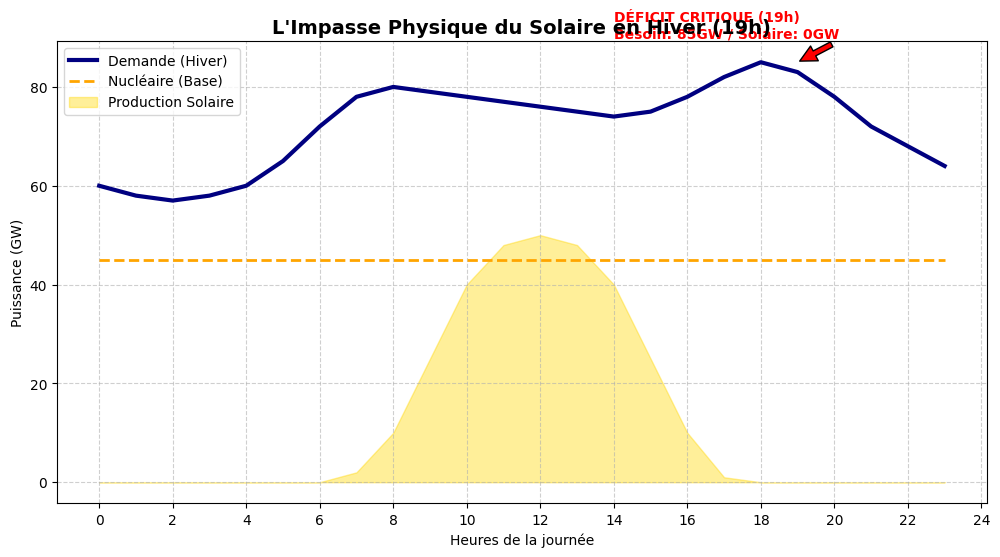

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Données simulées basées sur les profils types RTE (Hiver)
heures = np.arange(0, 24, 1)

# Consommation Hivernale (Pic le matin et le soir à 19h)
# Unité : GW (Gigawatts)
consommation = [60, 58, 57, 58, 60, 65, 72, 78, 80, 79, 78, 77, 
                76, 75, 74, 75, 78, 82, 85, 83, 78, 72, 68, 64]

# Production Solaire (Hypothèse parc massif x3 par rapport à ajd)
# Pic à midi, zéro la nuit
solaire = [0, 0, 0, 0, 0, 0, 0, 2, 10, 25, 40, 48, 
           50, 48, 40, 25, 10, 1, 0, 0, 0, 0, 0, 0]

# Production Nucléaire (Base "Ruban" stable)
nucleaire = [45] * 24

plt.figure(figsize=(12, 6))

# Tracé des courbes
plt.plot(heures, consommation, label='Demande (Hiver)', color='navy', linewidth=3)
plt.plot(heures, nucleaire, label='Nucléaire (Base)', color='orange', linestyle='--', linewidth=2)

# Zone de remplissage Solaire
plt.fill_between(heures, 0, solaire, color='gold', alpha=0.4, label='Production Solaire')

# Annotation du déficit
plt.annotate('DÉFICIT CRITIQUE (19h)\nBesoin: 85GW / Solaire: 0GW', 
             xy=(19, 85), xytext=(14, 90),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red', weight='bold')

plt.title('L\'Impasse Physique du Solaire en Hiver (19h)', fontsize=14, weight='bold')
plt.xlabel('Heures de la journée')
plt.ylabel('Puissance (GW)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(np.arange(0, 25, 2))

# Affichage
plt.show()

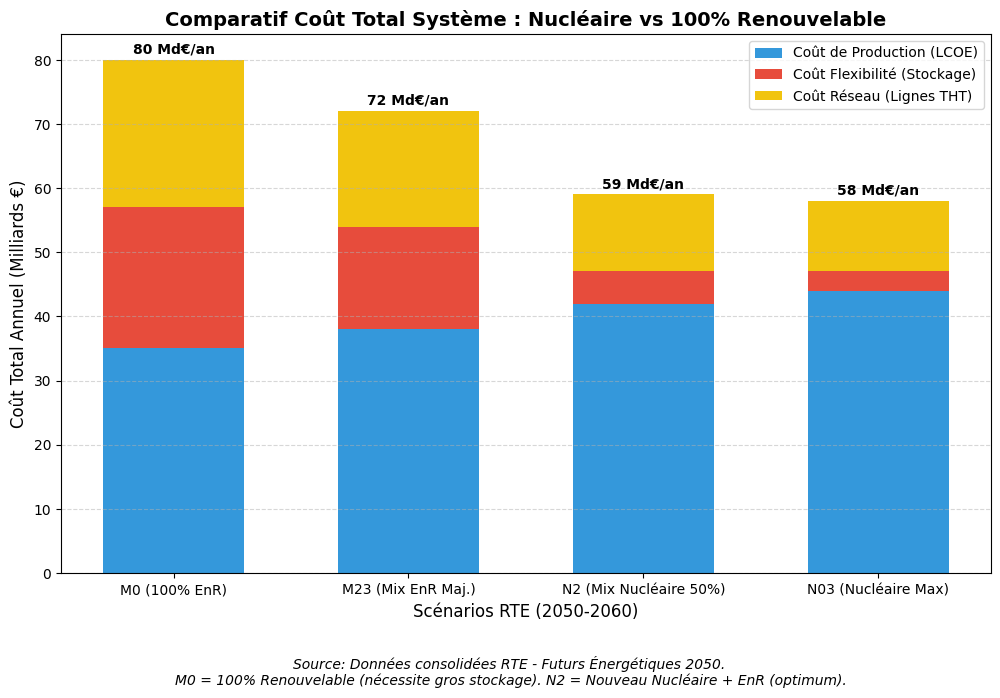

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Scénarios RTE
scenarios = ['M0 (100% EnR)', 'M23 (Mix EnR Maj.)', 'N2 (Mix Nucléaire 50%)', 'N03 (Nucléaire Max)']

# Coûts en Milliards d'Euros par an (Valeurs médianes rapport RTE 2021)
cout_production = [35, 38, 42, 44] # Le solaire/éolien est moins cher à produire
cout_flexibilite = [22, 16, 5, 3]  # Stockage, Batteries, Hydrogène (Explose en 100% EnR)
cout_reseau = [23, 18, 12, 11]     # Nouvelles lignes THT (Raccordement éolien marin/dispersé)

# Position des barres
x = np.arange(len(scenarios))
width = 0.6

plt.figure(figsize=(12, 7))

# Création des barres empilées
p1 = plt.bar(x, cout_production, width, label='Coût de Production (LCOE)', color='#3498db')
p2 = plt.bar(x, cout_flexibilite, width, bottom=cout_production, label='Coût Flexibilité (Stockage)', color='#e74c3c')
p3 = plt.bar(x, cout_reseau, width, bottom=np.array(cout_production)+np.array(cout_flexibilite), label='Coût Réseau (Lignes THT)', color='#f1c40f')

# Total labels
total_costs = np.array(cout_production) + np.array(cout_flexibilite) + np.array(cout_reseau)
for i in range(len(x)):
    plt.text(x[i], total_costs[i] + 1, f'{total_costs[i]} Md€/an', ha='center', weight='bold')

plt.title('Comparatif Coût Total Système : Nucléaire vs 100% Renouvelable', fontsize=14, weight='bold')
plt.ylabel('Coût Total Annuel (Milliards €)', fontsize=12)
plt.xlabel('Scénarios RTE (2050-2060)', fontsize=12)
plt.xticks(x, scenarios)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Note explicative
plt.figtext(0.5, -0.05, "Source: Données consolidées RTE - Futurs Énergétiques 2050. \nM0 = 100% Renouvelable (nécessite gros stockage). N2 = Nouveau Nucléaire + EnR (optimum).", 
            ha="center", fontsize=10, style='italic')

plt.show()

C:\Users\alban\AppData\Local\Temp\ipykernel_8688\989024629.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Pays', y='Production_TWh', data=df_europe, palette=colors)


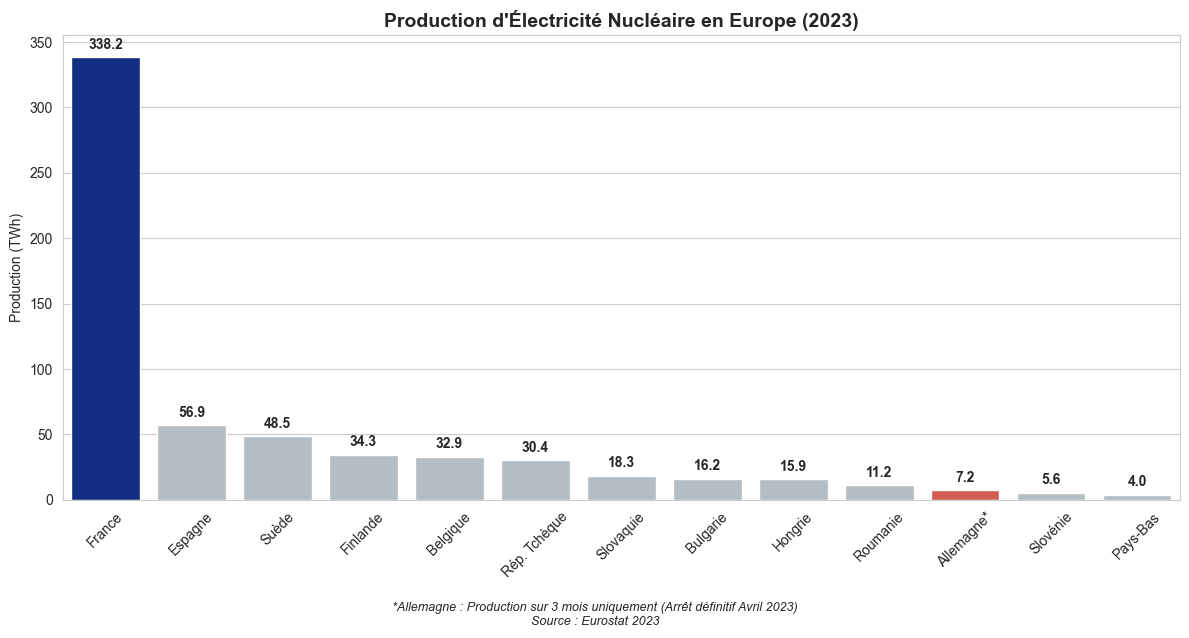

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Données Eurostat 2023 (Production brute en TWh)
# Source: Eurostat / WNA
data_europe = {
    'Pays': ['France', 'Espagne', 'Suède', 'Finlande', 'Belgique', 'Rép. Tchèque', 
             'Slovaquie', 'Bulgarie', 'Hongrie', 'Roumanie', 'Allemagne*', 'Slovénie', 'Pays-Bas'],
    'Production_TWh': [338.2, 56.9, 48.5, 34.3, 32.9, 30.4, 
                       18.3, 16.2, 15.9, 11.2, 7.2, 5.6, 4.0]
}

df_europe = pd.DataFrame(data_europe)

# Configuration du style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Barplot
colors = ['#002395' if x == 'France' else '#b0bec5' for x in df_europe['Pays']]
# Marquer l'Allemagne en rouge pour signifier l'arrêt
colors = ['#e74c3c' if x == 'Allemagne*' else c for c, x in zip(colors, df_europe['Pays'])]

barplot = sns.barplot(x='Pays', y='Production_TWh', data=df_europe, palette=colors)

# Annotations
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=10, weight='bold')

plt.title('Production d\'Électricité Nucléaire en Europe (2023)', fontsize=14, weight='bold')
plt.ylabel('Production (TWh)')
plt.xlabel('')
plt.xticks(rotation=45)

# Note explicative
plt.figtext(0.5, -0.05, "*Allemagne : Production sur 3 mois uniquement (Arrêt définitif Avril 2023)\nSource : Eurostat 2023", 
            ha="center", fontsize=9, style='italic')

plt.tight_layout()
plt.show()

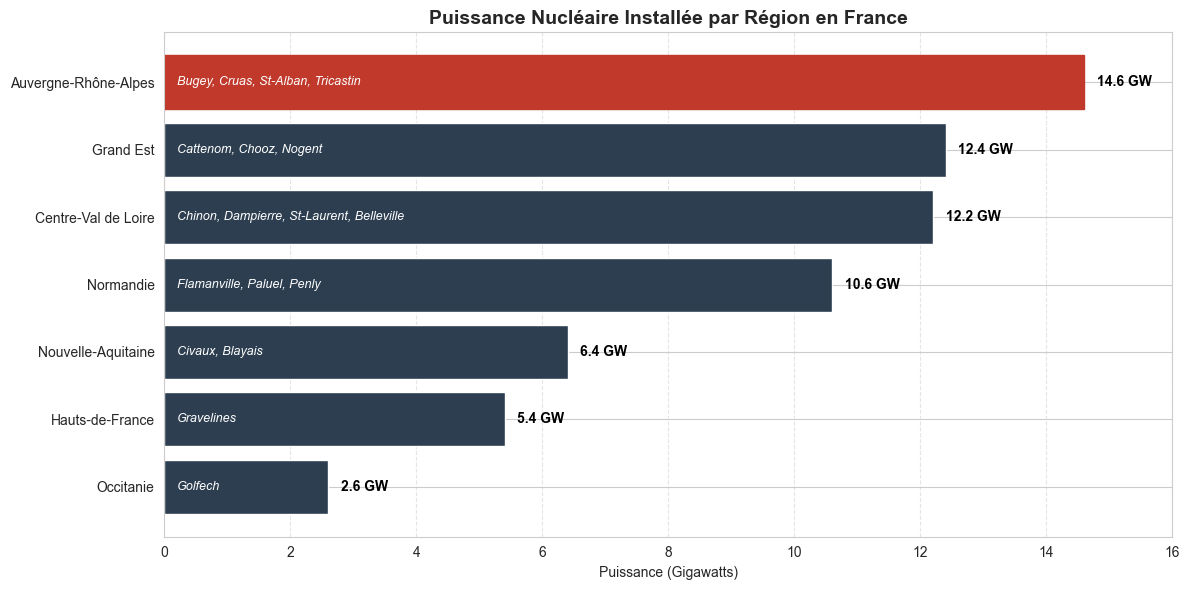

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Données basées sur le parc installé RTE (2023/2024)
# Centrales agrégées par région administrative
data_regions = {
    'Région': ['Auvergne-Rhône-Alpes', 'Grand Est', 'Centre-Val de Loire', 'Normandie', 
               'Nouvelle-Aquitaine', 'Hauts-de-France', 'Occitanie'],
    'Puissance_GW': [14.6, 12.4, 12.2, 10.6, 6.4, 5.4, 2.6],
    'Centrales': ['Bugey, Cruas, St-Alban, Tricastin', 
                  'Cattenom, Chooz, Nogent', 
                  'Chinon, Dampierre, St-Laurent, Belleville',
                  'Flamanville, Paluel, Penly',
                  'Civaux, Blayais',
                  'Gravelines',
                  'Golfech']
}

df_regions = pd.DataFrame(data_regions).sort_values('Puissance_GW', ascending=True)

plt.figure(figsize=(12, 6))

# Horizontal Bar Plot
bars = plt.barh(df_regions['Région'], df_regions['Puissance_GW'], color='#2c3e50')

# Highlight Auvergne-Rhône-Alpes
bars[-1].set_color('#c0392b') 

# Annotation des valeurs et des noms de centrales
for bar, names in zip(bars, df_regions['Centrales']):
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{width} GW', 
             va='center', weight='bold', color='black')
    plt.text(0.2, bar.get_y() + bar.get_height()/2, 
             names, 
             va='center', color='white', fontsize=9, style='italic')

plt.title('Puissance Nucléaire Installée par Région en France', fontsize=14, weight='bold')
plt.xlabel('Puissance (Gigawatts)')
plt.xlim(0, 16) # Marge pour le texte
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

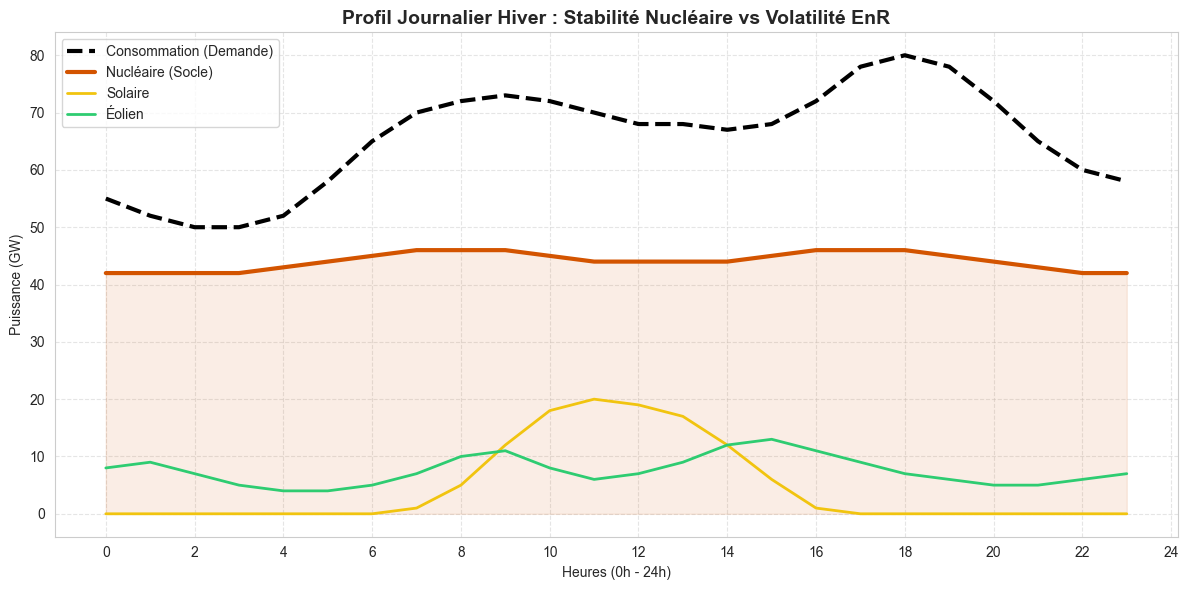

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Simulation d'une journée type d'hiver (Profil RTE)
heures = np.arange(0, 24, 1)

# 1. Nucléaire : Stable et Pilotable (Légère modulation possible)
nucleaire = [42, 42, 42, 42, 43, 44, 45, 46, 46, 46, 45, 44, 44, 44, 44, 45, 46, 46, 46, 45, 44, 43, 42, 42]

# 2. Solaire : Cloche parfaite (0 la nuit, pic à midi)
solaire = [0, 0, 0, 0, 0, 0, 0, 1, 5, 12, 18, 20, 19, 17, 12, 6, 1, 0, 0, 0, 0, 0, 0, 0]

# 3. Éolien : Intermittent et "Haché" (Hypothèse : vent variable sur la journée)
eolien = [8, 9, 7, 5, 4, 4, 5, 7, 10, 11, 8, 6, 7, 9, 12, 13, 11, 9, 7, 6, 5, 5, 6, 7]

# 4. Demande : La courbe à satisfaire
demande = [55, 52, 50, 50, 52, 58, 65, 70, 72, 73, 72, 70, 68, 68, 67, 68, 72, 78, 80, 78, 72, 65, 60, 58]

plt.figure(figsize=(12, 6))

# Tracé en aires empilées pour les EnR (montre leur apport cumulé)
plt.plot(heures, demande, color='black', linewidth=3, label='Consommation (Demande)', linestyle='--')
plt.plot(heures, nucleaire, color='#d35400', linewidth=3, label='Nucléaire (Socle)')

# Remplissage
plt.fill_between(heures, 0, nucleaire, color='#d35400', alpha=0.1)
plt.plot(heures, solaire, color='#f1c40f', linewidth=2, label='Solaire')
plt.plot(heures, eolien, color='#2ecc71', linewidth=2, label='Éolien')

plt.title('Profil Journalier Hiver : Stabilité Nucléaire vs Volatilité EnR', fontsize=14, weight='bold')
plt.xlabel('Heures (0h - 24h)')
plt.ylabel('Puissance (GW)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.xticks(np.arange(0, 25, 2))

plt.tight_layout()
plt.show()

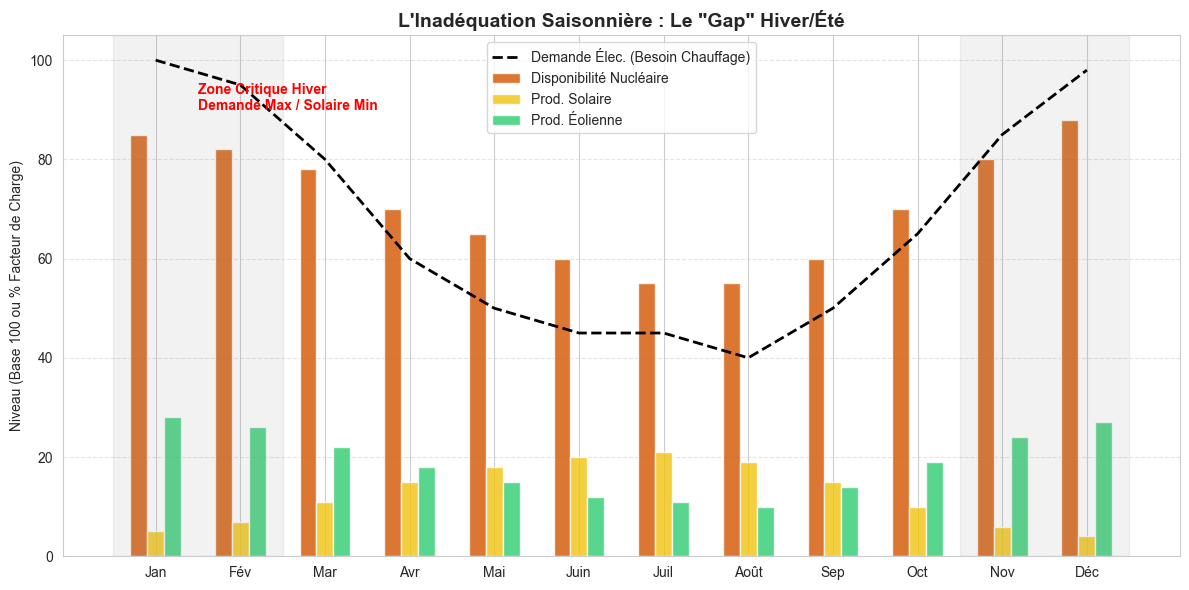

In [8]:
import matplotlib.pyplot as plt
import numpy as np

mois = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
x = np.arange(len(mois))

# Facteurs de charge moyens (Capacité à produire par rapport au max installé)
# Source : Moyennes historiques RTE
fc_solaire = [5, 7, 11, 15, 18, 20, 21, 19, 15, 10, 6, 4] # % de charge (Pic été)
fc_eolien = [28, 26, 22, 18, 15, 12, 11, 10, 14, 19, 24, 27] # % de charge (Pic hiver mais faible)
fc_nucleaire = [85, 82, 78, 70, 65, 60, 55, 55, 60, 70, 80, 88] # Suit la demande (Maintenance l'été)
demande_norm = [100, 95, 80, 60, 50, 45, 45, 40, 50, 65, 85, 98] # Base 100 en Janvier

plt.figure(figsize=(12, 6))

plt.plot(x, demande_norm, color='black', linewidth=2, linestyle='--', label='Demande Élec. (Besoin Chauffage)')

# Barres pour le Nucléaire (Disponibilité pilotée)
plt.bar(x - 0.2, fc_nucleaire, width=0.2, label='Disponibilité Nucléaire', color='#d35400', alpha=0.8)

# Barres pour les EnR
plt.bar(x, fc_solaire, width=0.2, label='Prod. Solaire', color='#f1c40f', alpha=0.8)
plt.bar(x + 0.2, fc_eolien, width=0.2, label='Prod. Éolienne', color='#2ecc71', alpha=0.8)

plt.title('L\'Inadéquation Saisonnière : Le "Gap" Hiver/Été', fontsize=14, weight='bold')
plt.ylabel('Niveau (Base 100 ou % Facteur de Charge)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(x, mois)

# Annotation "Zone Critique"
plt.axvspan(9.5, 11.5, color='grey', alpha=0.1) # Hiver
plt.axvspan(-0.5, 1.5, color='grey', alpha=0.1) # Hiver
plt.text(0.5, 90, "Zone Critique Hiver\nDemande Max / Solaire Min", ha='left', color='red', weight='bold')

plt.tight_layout()
plt.show()

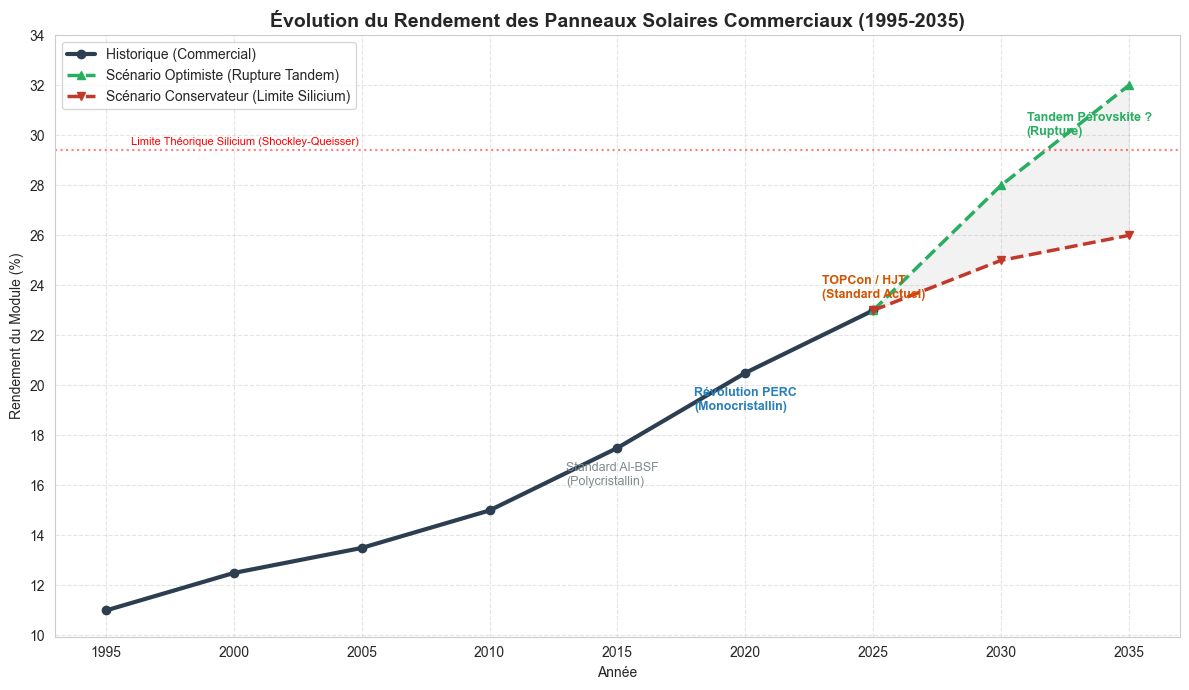

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Données Historiques (1995 - 2025)
# Basé sur les rapports NREL et ITRPV (International Technology Roadmap for Photovoltaic)
annees_hist = [1995, 2000, 2005, 2010, 2015, 2020, 2025]
rendement_hist = [11.0, 12.5, 13.5, 15.0, 17.5, 20.5, 23.0] # % Efficacité Module Commercial

# Projections 2030 - 2035
annees_proj = [2025, 2030, 2035]

# Scénario Pessimiste : Plafond du Silicium (Limite physique Shockley-Queisser approchée)
# Technologie : Amélioration marginale du TOPCon / HJT
rendement_pess = [23.0, 25.0, 26.0]

# Scénario Optimiste : Rupture Technologique (Tandem Pérovskite/Silicium)
# Industrialisation réussie des cellules multi-jonctions
rendement_opti = [23.0, 28.0, 32.0]

plt.figure(figsize=(12, 7))

# 1. Tracé Historique
plt.plot(annees_hist, rendement_hist, marker='o', color='#2c3e50', linewidth=3, label='Historique (Commercial)')

# 2. Tracé Futurs
plt.plot(annees_proj, rendement_opti, marker='^', color='#27ae60', linestyle='--', linewidth=2.5, label='Scénario Optimiste (Rupture Tandem)')
plt.plot(annees_proj, rendement_pess, marker='v', color='#c0392b', linestyle='--', linewidth=2.5, label='Scénario Conservateur (Limite Silicium)')

# Zone d'incertitude
plt.fill_between(annees_proj, rendement_pess, rendement_opti, color='gray', alpha=0.1)

# Annotations des technologies (Le "Pourquoi" de la hausse)
plt.text(2013, 16, "Standard Al-BSF\n(Polycristallin)", fontsize=9, color='#7f8c8d')
plt.text(2018, 19, "Révolution PERC\n(Monocristallin)", fontsize=9, weight='bold', color='#2980b9')
plt.text(2023, 23.5, "TOPCon / HJT\n(Standard Actuel)", fontsize=9, weight='bold', color='#d35400')
plt.text(2031, 30, "Tandem Pérovskite ?\n(Rupture)", fontsize=9, weight='bold', color='#27ae60')

# Mise en forme
plt.title('Évolution du Rendement des Panneaux Solaires Commerciaux (1995-2035)', fontsize=14, weight='bold')
plt.ylabel('Rendement du Module (%)')
plt.xlabel('Année')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(np.arange(1995, 2040, 5))
plt.yticks(np.arange(10, 36, 2))

# Limites physiques
plt.axhline(y=29.4, color='red', linestyle=':', alpha=0.5)
plt.text(1996, 29.6, "Limite Théorique Silicium (Shockley-Queisser)", color='red', fontsize=8)

plt.tight_layout()
plt.show()

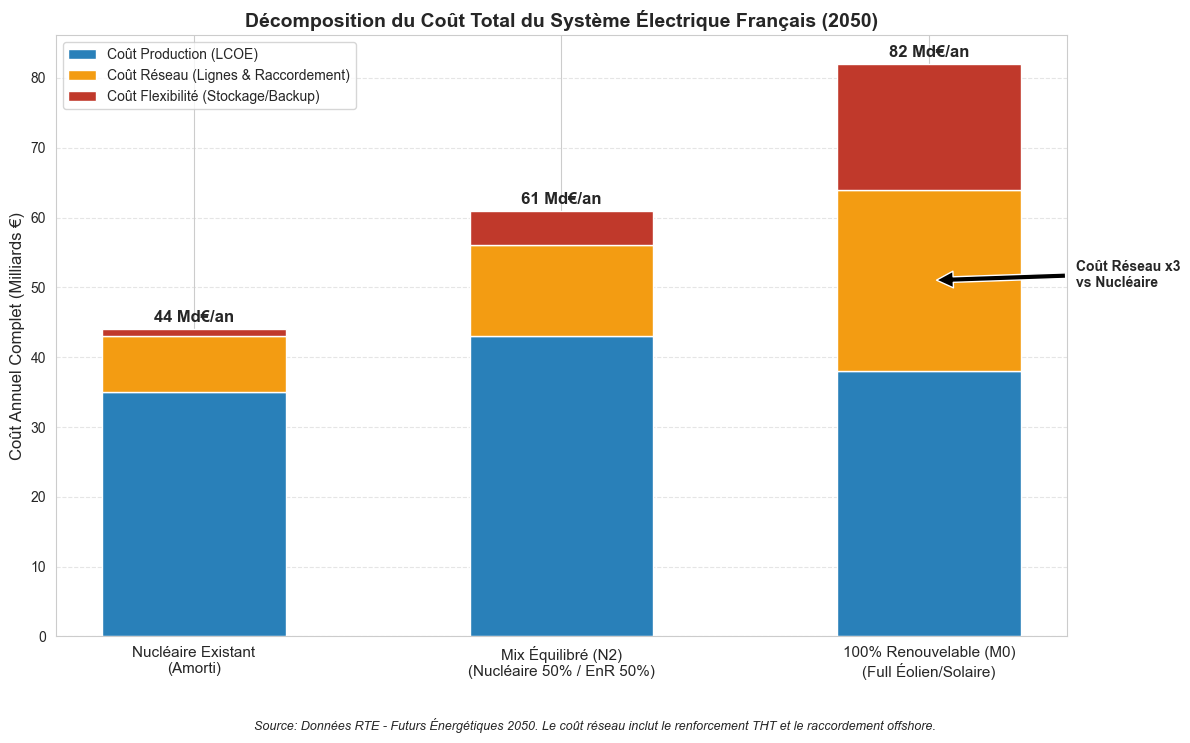

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Scénarios RTE - Futurs Énergétiques 2050
# Coûts annualisés en Milliards d'euros (Md€/an)
scenarios = ['Nucléaire Existant\n(Amorti)', 'Mix Équilibré (N2)\n(Nucléaire 50% / EnR 50%)', '100% Renouvelable (M0)\n(Full Éolien/Solaire)']

# 1. Coût de Production (CAPEX/OPEX des centrales)
# Le renouvelable est moins cher à produire en brut
cout_production = [35, 43, 38] 

# 2. Coût du Réseau (Transport RTE + Distribution Enedis)
# Le 100% EnR nécessite de mailler tout le territoire et raccordements offshore
cout_reseau = [8, 13, 26] 

# 3. Coût de Flexibilité (Stockage, Batteries, Centrales gaz secours)
# Le 100% EnR nécessite énormément de backup
cout_flexibilite = [1, 5, 18]

# Position des barres
x = np.arange(len(scenarios))
width = 0.5

plt.figure(figsize=(12, 7))

# Barres empilées
p1 = plt.bar(x, cout_production, width, label='Coût Production (LCOE)', color='#2980b9') # Bleu
p2 = plt.bar(x, cout_reseau, width, bottom=cout_production, label='Coût Réseau (Lignes & Raccordement)', color='#f39c12') # Orange
p3 = plt.bar(x, cout_flexibilite, width, bottom=np.array(cout_production)+np.array(cout_reseau), label='Coût Flexibilité (Stockage/Backup)', color='#c0392b') # Rouge

# Annotations des totaux
total_costs = np.array(cout_production) + np.array(cout_reseau) + np.array(cout_flexibilite)
for i in range(len(x)):
    # Total au dessus
    plt.text(x[i], total_costs[i] + 1, f'{total_costs[i]} Md€/an', ha='center', weight='bold', fontsize=12)
    # Annotation spécifique sur le réseau pour le scénario 100% EnR
    if i == 2:
        plt.annotate('Coût Réseau x3\nvs Nucléaire', 
                     xy=(x[i], cout_production[i] + cout_reseau[i]/2), 
                     xytext=(x[i]+0.4, 50),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     fontsize=10, weight='bold')

plt.title('Décomposition du Coût Total du Système Électrique Français (2050)', fontsize=14, weight='bold')
plt.ylabel('Coût Annuel Complet (Milliards €)', fontsize=12)
plt.xlabel('')
plt.xticks(x, scenarios, fontsize=11)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Note de bas de page
plt.figtext(0.5, -0.05, "Source: Données RTE - Futurs Énergétiques 2050. Le coût réseau inclut le renforcement THT et le raccordement offshore.", 
            ha="center", fontsize=9, style='italic')

plt.tight_layout()
plt.show()

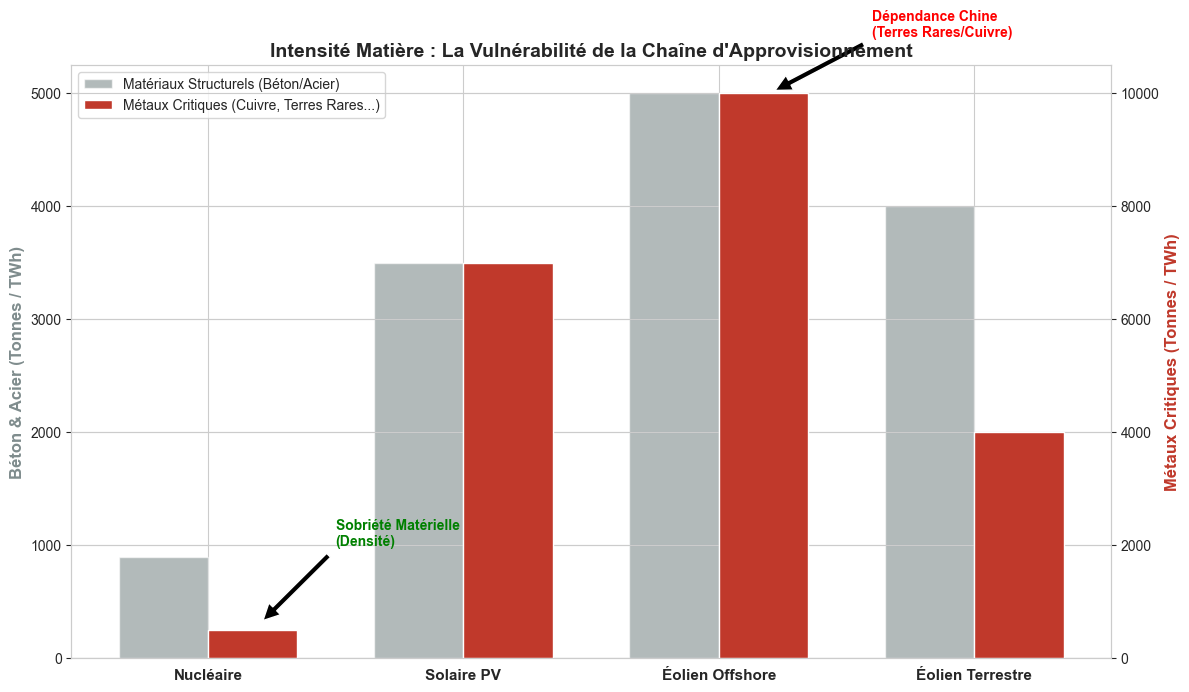

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Source : IEA (Agence Internationale de l'Énergie) - "The Role of Critical Minerals in Clean Energy Transitions" (2021)
# Unité : Tonnes par TWh produit sur la durée de vie

categories = ['Nucléaire', 'Solaire PV', 'Éolien Offshore', 'Éolien Terrestre']

# Matériaux de structure (Béton, Acier) - En milliers de tonnes
# Le nucléaire consomme du béton, mais l'éolien nécessite des socles immenses pour chaque mât
beton_acier = [900, 3500, 5000, 4000] 

# Métaux Critiques (Cuivre, Zinc, Silicium, Terres Rares) - En tonnes
# C'est là que se joue la géopolitique (Dépendance Chine)
metaux_critiques = [500, 7000, 10000, 4000] 

x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(12, 7))

# Création de deux axes pour gérer les échelles très différentes (Béton vs Métaux précieux)
ax1 = plt.gca()
ax2 = ax1.twinx()

# Barres Béton/Acier (Axe de gauche)
p1 = ax1.bar(x - width/2, beton_acier, width, label='Matériaux Structurels (Béton/Acier)', color='#7f8c8d', alpha=0.6)

# Barres Métaux Critiques (Axe de droite)
p2 = ax2.bar(x + width/2, metaux_critiques, width, label='Métaux Critiques (Cuivre, Terres Rares...)', color='#c0392b')

# Mise en forme
ax1.set_ylabel('Béton & Acier (Tonnes / TWh)', color='#7f8c8d', fontsize=12, weight='bold')
ax2.set_ylabel('Métaux Critiques (Tonnes / TWh)', color='#c0392b', fontsize=12, weight='bold')
plt.title('Intensité Matière : La Vulnérabilité de la Chaîne d\'Approvisionnement', fontsize=14, weight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, fontsize=11, weight='bold')

# Légende combinée
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Annotation Géopolitique
plt.annotate('Dépendance Chine\n(Terres Rares/Cuivre)', 
             xy=(2.2, 10000), xytext=(2.6, 11000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, weight='bold', color='red')

plt.annotate('Sobriété Matérielle\n(Densité)', 
             xy=(0.2, 600), xytext=(0.5, 2000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, weight='bold', color='green')

plt.tight_layout()
plt.show()

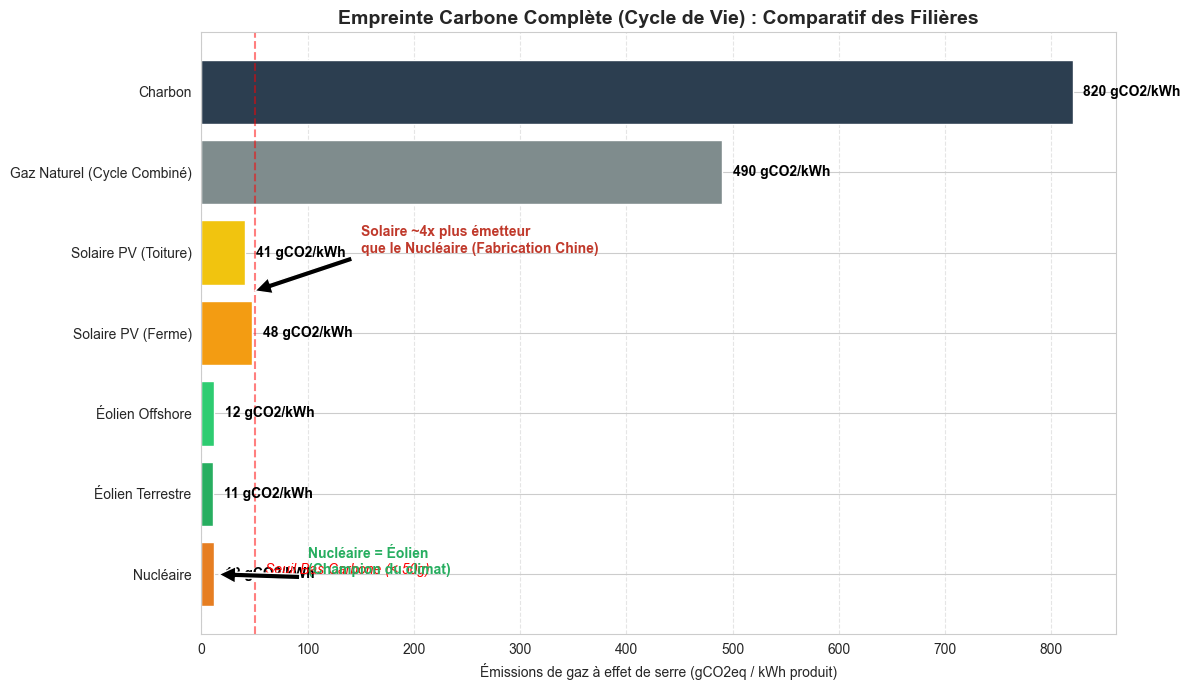

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Données : Médiane des émissions gCO2eq/kWh (Source : GIEC / IPCC 2014 & UNECE 2021)
energies = ['Charbon', 'Gaz Naturel (Cycle Combiné)', 'Solaire PV (Toiture)', 'Solaire PV (Ferme)', 'Éolien Offshore', 'Éolien Terrestre', 'Nucléaire']
emissions = [820, 490, 41, 48, 12, 11, 12]

# Couleurs : Gris pour fossiles, Jaune/Vert pour EnR, Orange pour Nucléaire
colors = ['#2c3e50', '#7f8c8d', '#f1c40f', '#f39c12', '#2ecc71', '#27ae60', '#e67e22']

plt.figure(figsize=(12, 7))

# Création du barplot horizontal
bars = plt.barh(energies, emissions, color=colors)

# Inversion pour avoir le Charbon en haut (contraste) ou le nucléaire en bas
plt.gca().invert_yaxis()

# Ajout des valeurs au bout des barres
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 10
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{int(width)} gCO2/kWh', va='center', weight='bold', color='black')

# Ligne de démarcation "Bas Carbone"
plt.axvline(x=50, color='red', linestyle='--', alpha=0.5)
plt.text(60, 6, "Seuil Bas Carbone (< 50g)", color='red', fontsize=10, style='italic')

# Annotations Stratégiques
plt.title('Empreinte Carbone Complète (Cycle de Vie) : Comparatif des Filières', fontsize=14, weight='bold')
plt.xlabel('Émissions de gaz à effet de serre (gCO2eq / kWh produit)')

# Zoom explicatif sur le Solaire vs Nucléaire
plt.annotate('Solaire ~4x plus émetteur\nque le Nucléaire (Fabrication Chine)', 
             xy=(45, 2.5), xytext=(150, 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, weight='bold', color='#c0392b')

plt.annotate('Nucléaire = Éolien\n(Champion du climat)', 
             xy=(12, 6), xytext=(100, 6),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, weight='bold', color='#27ae60')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

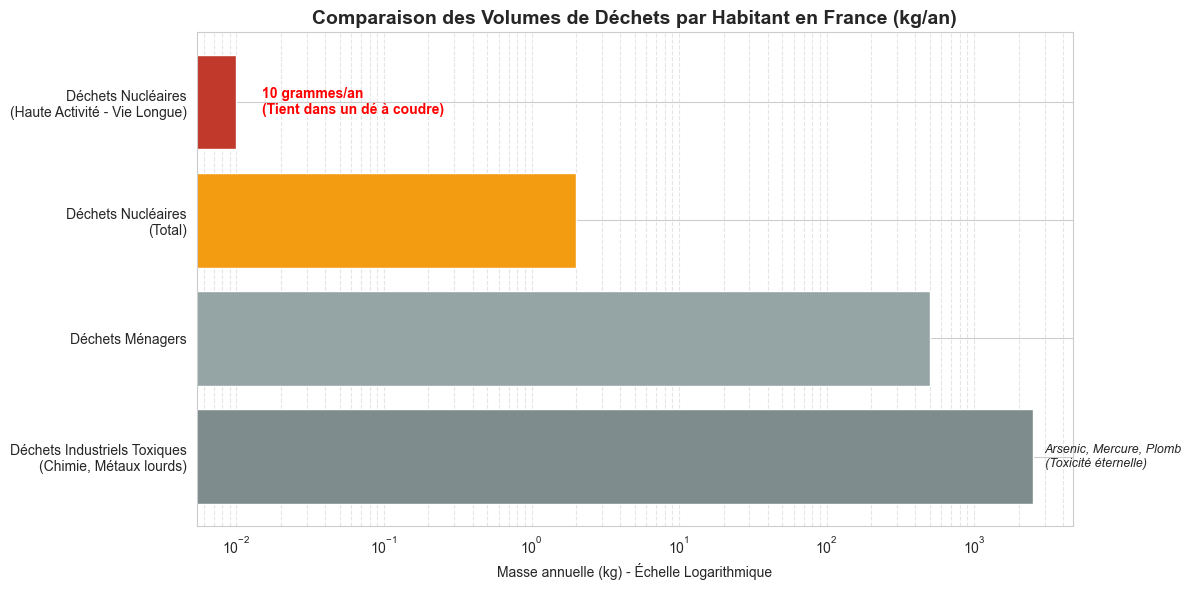

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Données : Volume de déchets produits par an par habitant en France (kg/an)
# Source : ANDRA (Agence nationale pour la gestion des déchets radioactifs)
categories = ['Déchets Industriels Toxiques\n(Chimie, Métaux lourds)', 'Déchets Ménagers', 'Déchets Nucléaires\n(Total)', 'Déchets Nucléaires\n(Haute Activité - Vie Longue)']

# Valeurs approximatives
valeurs = [2500, 500, 2, 0.010] # 10 grammes pour le hautement radioactif

# Création du graphique avec échelle logarithmique (indispensable vu l'écart)
plt.figure(figsize=(12, 6))

colors = ['#7f8c8d', '#95a5a6', '#f39c12', '#c0392b']
bars = plt.barh(categories, valeurs, color=colors)

plt.xscale('log') # Échelle log pour voir les petits volumes
plt.title('Comparaison des Volumes de Déchets par Habitant en France (kg/an)', fontsize=14, weight='bold')
plt.xlabel('Masse annuelle (kg) - Échelle Logarithmique')

# Annotations
plt.text(3000, 0, "Arsenic, Mercure, Plomb\n(Toxicité éternelle)", va='center', fontsize=9, style='italic')
plt.text(0.015, 3, "10 grammes/an\n(Tient dans un dé à coudre)", va='center', weight='bold', color='red')

plt.grid(axis='x', linestyle='--', alpha=0.5, which='both')
plt.tight_layout()
plt.show()

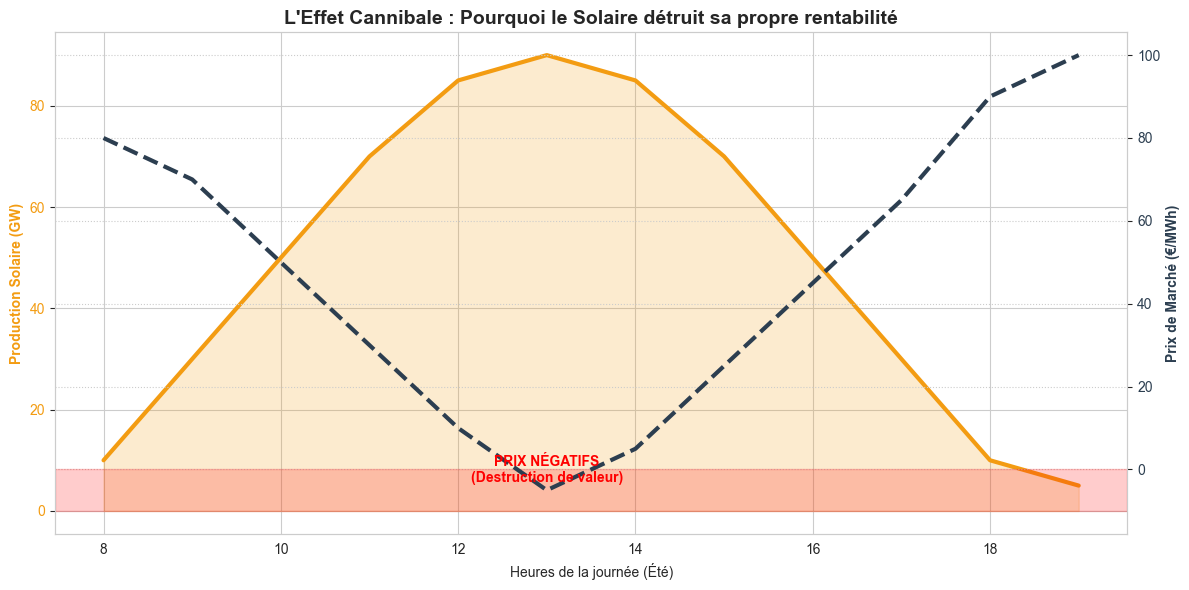

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Simulation de la courbe de prix vs production solaire
heures = np.arange(8, 20) # Journée de 8h à 20h

# Production Solaire (Cloche)
production_solaire = [10, 30, 50, 70, 85, 90, 85, 70, 50, 30, 10, 5]

# Prix de marché de l'électricité (€/MWh) - Inversement corrélé
# Quand le solaire produit max, le prix chute (parfois négatif)
prix_marche = [80, 70, 50, 30, 10, -5, 5, 25, 45, 65, 90, 100]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe 1 : Production
ax1.set_xlabel('Heures de la journée (Été)')
ax1.set_ylabel('Production Solaire (GW)', color='#f39c12', weight='bold')
ax1.plot(heures, production_solaire, color='#f39c12', linewidth=3, label='Production Solaire')
ax1.fill_between(heures, 0, production_solaire, color='#f39c12', alpha=0.2)
ax1.tick_params(axis='y', labelcolor='#f39c12')

# Axe 2 : Prix
ax2 = ax1.twinx()
ax2.set_ylabel('Prix de Marché (€/MWh)', color='#2c3e50', weight='bold')
ax2.plot(heures, prix_marche, color='#2c3e50', linewidth=3, linestyle='--', label='Prix Spot Électricité')
ax2.tick_params(axis='y', labelcolor='#2c3e50')

# Zone de prix négatifs
plt.axhspan(-10, 0, color='red', alpha=0.2)
plt.text(13, -3, "PRIX NÉGATIFS\n(Destruction de valeur)", color='red', weight='bold', ha='center')

plt.title('L\'Effet Cannibale : Pourquoi le Solaire détruit sa propre rentabilité', fontsize=14, weight='bold')
plt.grid(True, linestyle=':')
fig.tight_layout()
plt.show()

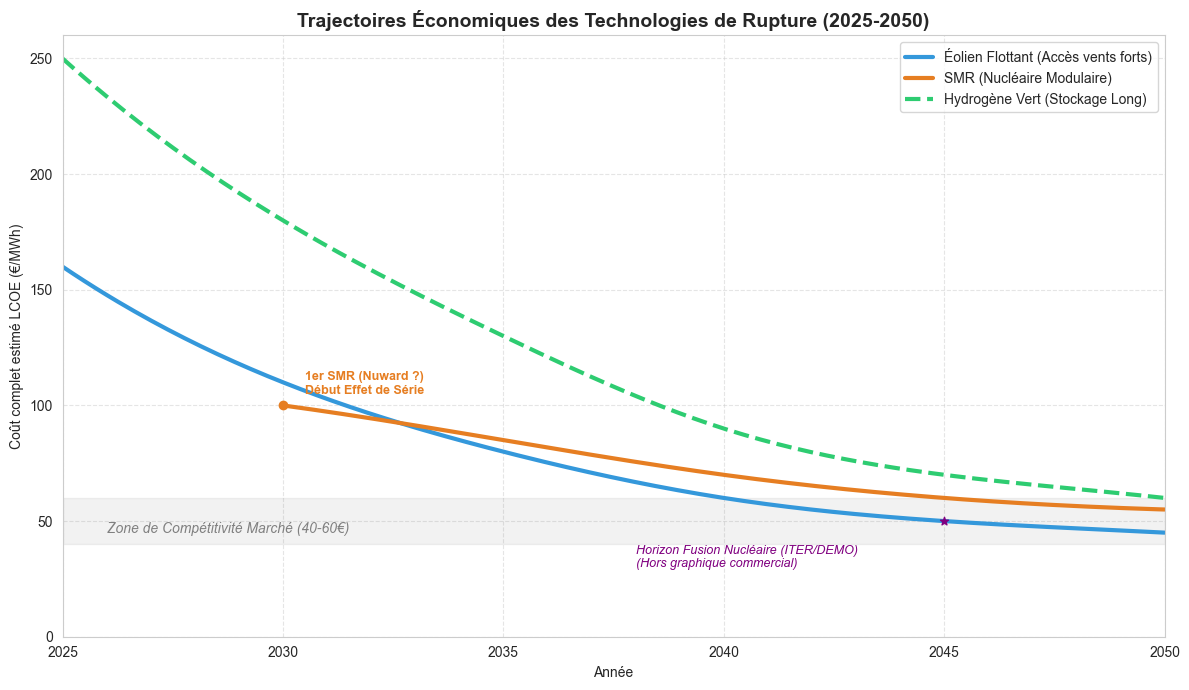

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Années de projection
years = np.array([2025, 2030, 2035, 2040, 2045, 2050])

# 1. Éolien Flottant (Floating Offshore Wind)
# Aujourd'hui très cher (proto), baisse rapide grâce à l'industrialisation
lcoe_float = np.array([160, 110, 80, 60, 50, 45])

# 2. SMR (Small Modular Reactors - Nucléaire Série)
# Démarre vers 2030. Prix stable au début (tête de série), puis chute (effet série type aviation)
lcoe_smr = np.array([np.nan, 100, 85, 70, 60, 55]) # Pas dispo en 2025

# 3. Hydrogène Vert (Production par électrolyse pour stockage)
# Exprimé en équivalent €/MWh restitué (très cher aujourd'hui, dépend du prix élec)
lcoe_h2 = np.array([250, 180, 130, 90, 70, 60])

# Interpolation pour lisser les courbes
years_smooth = np.linspace(2025, 2050, 200)

spl_float = make_interp_spline(years, lcoe_float, k=3)
y_float = spl_float(years_smooth)

# Pour le SMR, on commence à 2030
years_smr = np.linspace(2030, 2050, 150)
spl_smr = make_interp_spline(years[1:], lcoe_smr[1:], k=3)
y_smr = spl_smr(years_smr)

spl_h2 = make_interp_spline(years, lcoe_h2, k=3)
y_h2 = spl_h2(years_smooth)

plt.figure(figsize=(12, 7))

# Tracé des courbes
plt.plot(years_smooth, y_float, color='#3498db', linewidth=3, label='Éolien Flottant (Accès vents forts)')
plt.plot(years_smr, y_smr, color='#e67e22', linewidth=3, linestyle='-', label='SMR (Nucléaire Modulaire)')
plt.plot(years_smooth, y_h2, color='#2ecc71', linewidth=3, linestyle='--', label='Hydrogène Vert (Stockage Long)')

# Zone de compétitivité marché (Prix de gros historique)
plt.axhspan(40, 60, color='gray', alpha=0.1)
plt.text(2026, 45, "Zone de Compétitivité Marché (40-60€)", fontsize=10, style='italic', color='gray')

# Annotations Ruptures
plt.scatter(2030, 100, color='#e67e22', zorder=5)
plt.text(2030.5, 105, "1er SMR (Nuward ?)\nDébut Effet de Série", fontsize=9, color='#e67e22', weight='bold')

plt.scatter(2045, 50, color='purple', zorder=5, marker='*')
plt.text(2038, 30, "Horizon Fusion Nucléaire (ITER/DEMO)\n(Hors graphique commercial)", fontsize=9, color='purple', style='italic')

plt.title('Trajectoires Économiques des Technologies de Rupture (2025-2050)', fontsize=14, weight='bold')
plt.ylabel('Coût complet estimé LCOE (€/MWh)')
plt.xlabel('Année')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlim(2025, 2050)
plt.ylim(0, 260)

plt.tight_layout()
plt.show()